7236
          Name  Gender
0         Will    male
1        James    male
2       Samuel    male
3         John    male
4       George    male
...        ...     ...
249982  Laisha  female
249985  Jailyn  female
249992   Iyana  female
249993   Kenna  female
249999   Maiya  female

[7236 rows x 2 columns]
      starring                movie_name Gender
0          Tim  The Shawshank Redemption       
0       Morgan  The Shawshank Redemption       
0          Bob  The Shawshank Redemption       
1       Marlon             The Godfather       
1           Al             The Godfather       
..         ...                       ...    ...
248  Nastassja              Paris, Texas       
248       Dean              Paris, Texas       
249    Toshirô           Throne of Blood       
249     Minoru           Throne of Blood       
249      Isuzu           Throne of Blood       

[750 rows x 3 columns]
       starring                        movie_name Gender_x    Name Gender_y
0           Tim   

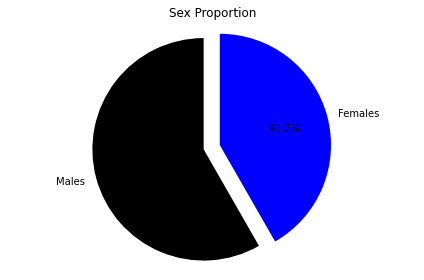

In [45]:
##-----------------------Analysis of gender diversity in the scraped movies--------------------------

## Importing all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math
import json
import urllib
import requests

#We get our data as a JSON database from "back4app"
#This database includes 250,000 different names and assigns wether they are for boys or girls

url = 'https://parseapi.back4app.com/classes/Complete_List_Names?limit=250000'
headers = {
    'X-Parse-Application-Id': 'zsSkPsDYTc2hmphLjjs9hz2Q3EXmnSxUyXnouj1I', 
    'X-Parse-Master-Key': '4LuCXgPPXXO2sU5cXm6WwpwzaKyZpo3Wpj4G4xXK' 
}
data = json.loads(requests.get(url, headers=headers).content.decode('utf-8')) 

#Define the fields of interest and normalize data using "json_normalize"
FIELDS = ["Name", "Gender"]
name_database_all = pd.json_normalize(data["results"])

name_database = name_database_all[FIELDS]
#### We now have a datababase with 250 000 names and the repsective gender

#Loading CSV file with scraped data
names_scraped = pd.read_csv("imdb_top_movies.csv")

## using the pd.explode to create a new row for each actor
names_scraped_rows = names_scraped[["starring", "movie_name"]].assign( starring = names_scraped["starring"].str.split(", ")).explode("starring")

#Cleaning the row "starring" that contains the names
names_scraped_rows["starring"] = names_scraped_rows["starring"].str.split(" ", n = 1, expand = True)
names_scraped_rows["starring"] = names_scraped_rows["starring"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "")

#Create an empty column to be filled
names_scraped_rows["Gender"] = ""

name_database = name_database.loc[:, ["Name", "Gender"]]
name_database = name_database.drop_duplicates()
print(len(name_database))
print(name_database)
print(names_scraped_rows)

#We use merge to match the names we scraped with the implied gender from our dataset
df = pd.merge(names_scraped_rows, name_database, how="outer", left_on="starring", right_on="Name")
df.dropna(subset = ["movie_name"], inplace=True)
print(df)

df['Gender_y'].value_counts()
male_count =((df.Gender_y == 'male').sum())
female_count = ((df.Gender_y == 'female').sum())

print(male_count)
print(female_count)

proportions = [male_count, female_count]

plt.pie(proportions,labels = ['Males', 'Females'],shadow = False, colors = ['black','blue'], explode = (0.15 , 0), startangle = 90,autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Sex Proportion")
plt.tight_layout()
plt.show()

In [ ]:
##-----------------------Analysis of gender diversity in the scraped movies--------------------------

## Importing all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math

#We get our data as a JSON database from "back4app"
url = 'https://parseapi.back4app.com/classes/Complete_List_Names?limit=250000'
headers = {
    'X-Parse-Application-Id': 'zsSkPsDYTc2hmphLjjs9hz2Q3EXmnSxUyXnouj1I', # This is the fake app's application id
    'X-Parse-Master-Key': '4LuCXgPPXXO2sU5cXm6WwpwzaKyZpo3Wpj4G4xXK' # This is the fake app's readonly master key
}
data = json.loads(requests.get(url, headers=headers).content.decode('utf-8')) # Here you have the data that you need

#Define the fields of interest and normalize data using "json_normalize"
FIELDS = ["Name", "Gender"]
name_database_all = pd.json_normalize(data["results"])

name_database = name_database_all[FIELDS]
####We now have a datababase with 250 000 names and the repsective gender

#Loading CSV file with scraped data
names_scraped = pd.read_csv("imdb_top_movies.csv")

## using the pd.explode to create a new row for each actor
names_scraped_rows = names_scraped[["starring", "movie_name"]].assign( starring = imdb_top_movies["starring"].str.split(", ")).explode("starring")

#Cleaning the row "starring" that contains the names
names_scraped_rows["starring"] = names_scraped_rows["starring"].str.split(" ", n = 1, expand = True)
names_scraped_rows["starring"] = names_scraped_rows["starring"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "")
names_scraped_rows["Gender"] = ""

names = names.loc[:, ["name", "sex"]]
names = names.drop_duplicates()

df = pd.merge(names_scraped_rows, names, how="outer", left_on="starring", right_on="name")
df.loc[30:40,]


#We add a Gender column by matching the names in the database using lookup
name_database = name_database.set_index('Name')
names_scraped_rows['Gender'] = name_database.lookup(names_scraped_rows['Starring'],name_database["Gender"])





In [ ]:
names_scraped_rows["starring"]= names_scraped_rows["starring"].str.split("t", n = 1, expand = True)

#Set up for loop, we will compare the names we scraped with the names in the database and fill the lsit
for element in names_scraped_rows["starring"]:
    if element in names["name"]:
        names_scraped_rows["Gender"] = "


#I define a translation function

def translate(lst):
    #We define the dictionary - I added the word "friends" as a check
    dictionary = {"merry":"god", "christmas":"jul", "and":"och","happy":"gott", "new":"nytt", "year":"ar","friends":"vänner"}
    list_SWE = []
    #We fill up to empty list using a for and if loop that checks wether element is in the dictionary
    for element in lst:
        if element in dictionary:
            list_SWE.append(dictionary[element])
    return(" ".join(list_SWE))
#I return the words as a string, instead of a list, by appending the elements in the list

#We test the result
translate(['merry', 'christmas', 'and', 'happy', 'new', 'year', 'friends'])

gender = []
#Set up for loop, we will compare the names we scraped with the names in the database and fill the lsit
for  in names_scraped_rows["starring"]:
    if element in names["name"]:
        names_scraped_rows

gender


#Set up for loop, we will compare the names we scraped with the names in the database and fill the lsit
for element in names_scraped_rows["starring"]:
    if element in names["name"]:
        names_scraped_rows["Gender"] = ""

names_scraped_rows

In [1]:
import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender(u"Bob"))
print(d.get_gender(u"Sally"))
print(d.get_gender(u"Pauley")) # should be androgynous
andy

ModuleNotFoundError: No module named 'gender_guesser'

In [44]:
dictionary = names.set_index('name').to_dict()['sex']
dictionary

import pandas as pd
df = pd.read_csv(filename,names=['code'])
df[['code','name_of_code']] = df["code"].str.split(" ", 1, expand=True)
df["name_of_code"] = df["name_of_code"].str.strip("-")
print(df)

{'John': 'girl',
 'William': 'girl',
 'James': 'girl',
 'Charles': 'girl',
 'George': 'girl',
 'Frank': 'girl',
 'Joseph': 'girl',
 'Thomas': 'girl',
 'Henry': 'girl',
 'Robert': 'girl',
 'Edward': 'girl',
 'Harry': 'girl',
 'Walter': 'girl',
 'Arthur': 'girl',
 'Fred': 'girl',
 'Albert': 'girl',
 'Samuel': 'boy',
 'David': 'girl',
 'Louis': 'girl',
 'Joe': 'girl',
 'Charlie': 'girl',
 'Clarence': 'girl',
 'Richard': 'girl',
 'Andrew': 'girl',
 'Daniel': 'girl',
 'Ernest': 'girl',
 'Will': 'girl',
 'Jesse': 'girl',
 'Oscar': 'boy',
 'Lewis': 'boy',
 'Peter': 'boy',
 'Benjamin': 'boy',
 'Frederick': 'boy',
 'Willie': 'girl',
 'Alfred': 'girl',
 'Sam': 'boy',
 'Roy': 'girl',
 'Herbert': 'boy',
 'Jacob': 'boy',
 'Tom': 'girl',
 'Elmer': 'girl',
 'Carl': 'girl',
 'Lee': 'girl',
 'Howard': 'girl',
 'Martin': 'boy',
 'Michael': 'girl',
 'Bert': 'girl',
 'Herman': 'boy',
 'Jim': 'boy',
 'Francis': 'girl',
 'Harvey': 'boy',
 'Earl': 'girl',
 'Eugene': 'girl',
 'Ralph': 'girl',
 'Ed': 'boy',
 '

In [55]:
#Loading CSV file with names
names = pd.read_csv("baby-names.csv")
len(names) #258 000 names
names.head()

#Setting up dictionary match female names with female and male names with male
dictionary = names.set_index('name').to_dict()
dictionary
#Loading CSV file with names
names = pd.read_csv("baby-names.csv")
len(names) #258 000 names
names.head()

#Setting up dictionary match female names with female and male names with male
dictionary = names.to_dict()["Name"]
dictionary

KeyError: 'Name'

In [118]:
names_scraped_rows

,starring,movie_name,Gender
0,Tim,The Shawshank Redemption,
0,Morgan,The Shawshank Redemption,
0,Bob,The Shawshank Redemption,
1,Marlon,The Godfather,
1,Al,The Godfather,
...,...,...,...
248,Nastassja,"Paris, Texas",
248,Dean,"Paris, Texas",
249,Toshirô,Throne of Blood,
249,Minoru,Throne of Blood,
